In [1]:
import pickle
import sys
sys.path.append('..')
from utils import calc_model_importance
from preprocess import add_cluster_feature, add_feature_pca
import pandas as pd
import numpy as np

In [2]:
model = pickle.load(open('/home/yoshikawa/work/kaggle/OPVP/output/feature_model/20210903/lgbm_test_importance_figure/lgbm0.pkl', 'rb'))
df_train = pd.read_pickle('/home/yoshikawa/work/kaggle/OPVP/output/feature_model/20210901/new_feature_lgbm2/train.pkl')

In [3]:
imp = calc_model_importance(model, feature_names=df_train.drop(['row_id', 'time_id', 'target'], axis=1).columns.values.tolist())
imp

,importance
trade_log_return_realized_volatility_500_min_stock,0.000000e+00
trade_log_return_realized_volatility_400_min_stock,1.837203e+00
log_return_realized_volatility_100_max_stock,2.840155e+00
log_return2_realized_volatility_400_min_stock,5.269656e+00
trade_log_return_realized_volatility_300_min_stock,5.651158e+00
...,...
stock_id,1.078424e+05
log_return2_realized_volatility_100,1.820456e+05
log_return_realized_volatility_200,4.365100e+05
log_return_realized_volatility_100,7.911601e+05


In [4]:
volume = [col for col in list(df_train) if 'total_volume_mean' in col]
volume

['total_volume_mean',
 'total_volume_mean_500',
 'total_volume_mean_400',
 'total_volume_mean_300',
 'total_volume_mean_200',
 'total_volume_mean_100']

In [5]:
volatility = [col for col in list(df_train) if 'volatility' in col]
volatility

['log_return_realized_volatility',
 'log_return2_realized_volatility',
 'log_return_realized_volatility_500',
 'log_return2_realized_volatility_500',
 'log_return_realized_volatility_400',
 'log_return2_realized_volatility_400',
 'log_return_realized_volatility_300',
 'log_return2_realized_volatility_300',
 'log_return_realized_volatility_200',
 'log_return2_realized_volatility_200',
 'log_return_realized_volatility_100',
 'log_return2_realized_volatility_100',
 'trade_log_return_realized_volatility',
 'trade_log_return_realized_volatility_500',
 'trade_log_return_realized_volatility_400',
 'trade_log_return_realized_volatility_300',
 'trade_log_return_realized_volatility_200',
 'trade_log_return_realized_volatility_100',
 'log_return_realized_volatility_mean_stock',
 'log_return_realized_volatility_std_stock',
 'log_return_realized_volatility_max_stock',
 'log_return_realized_volatility_min_stock',
 'log_return2_realized_volatility_mean_stock',
 'log_return2_realized_volatility_std_st

In [6]:
volatility = [col for col in list(df_train) if 'trade_log_return_realized_volatility' in col]
volatility

['trade_log_return_realized_volatility',
 'trade_log_return_realized_volatility_500',
 'trade_log_return_realized_volatility_400',
 'trade_log_return_realized_volatility_300',
 'trade_log_return_realized_volatility_200',
 'trade_log_return_realized_volatility_100',
 'trade_log_return_realized_volatility_mean_stock',
 'trade_log_return_realized_volatility_std_stock',
 'trade_log_return_realized_volatility_max_stock',
 'trade_log_return_realized_volatility_min_stock',
 'trade_log_return_realized_volatility_500_mean_stock',
 'trade_log_return_realized_volatility_500_std_stock',
 'trade_log_return_realized_volatility_500_max_stock',
 'trade_log_return_realized_volatility_500_min_stock',
 'trade_log_return_realized_volatility_400_mean_stock',
 'trade_log_return_realized_volatility_400_std_stock',
 'trade_log_return_realized_volatility_400_max_stock',
 'trade_log_return_realized_volatility_400_min_stock',
 'trade_log_return_realized_volatility_300_mean_stock',
 'trade_log_return_realized_vol

In [7]:
volume = [col for col in list(df_train) if 'order_count' in col]
volume

['trade_order_count_mean',
 'trade_order_count_amax',
 'trade_order_count_sum',
 'trade_order_count_mean_500',
 'trade_order_count_amax_500',
 'trade_order_count_sum_500',
 'trade_order_count_mean_400',
 'trade_order_count_amax_400',
 'trade_order_count_sum_400',
 'trade_order_count_mean_300',
 'trade_order_count_amax_300',
 'trade_order_count_sum_300',
 'trade_order_count_mean_200',
 'trade_order_count_amax_200',
 'trade_order_count_sum_200',
 'trade_order_count_mean_100',
 'trade_order_count_amax_100',
 'trade_order_count_sum_100']

In [8]:
df_new_train = pickle.load(open('/home/yoshikawa/work/kaggle/OPVP/output/feature_model/20210907/lgbm_add_cluster_feature/train.pkl', 'rb'))

In [9]:
train_num_data = df_train.drop(['stock_id', 'time_id', 'row_id', 'target'], axis=1)
train_num_data.replace([np.inf, -np.inf], np.nan, inplace = True)
train_num_data = train_num_data.fillna(train_num_data.mean())


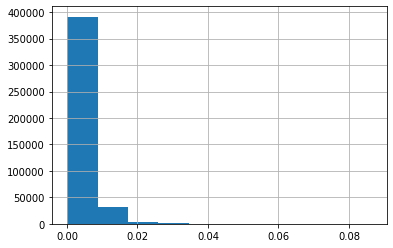

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

df_new_train['log_return_realized_volatility'].hist()
plt.show()